# Yield Predection

## <font color='Blue'><b>Part -2 Building all possible ML models for the given data set :

In [155]:
# importing required libraries and dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import warnings as w
w.filterwarnings("ignore")

In [157]:
# Load the dataset
df = pd.read_csv("yield_df.csv")
df

,Sl.no,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [159]:
# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sl.no                          28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  int64  
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


(None,
    Sl.no     Area         Item  Year  hg/ha_yield  \
 0      0  Albania        Maize  1990        36613   
 1      1  Albania     Potatoes  1990        66667   
 2      2  Albania  Rice, paddy  1990        23333   
 3      3  Albania      Sorghum  1990        12500   
 4      4  Albania     Soybeans  1990         7000   
 
    average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
 0                           1485              121.0     16.37  
 1                           1485              121.0     16.37  
 2                           1485              121.0     16.37  
 3                           1485              121.0     16.37  
 4                           1485              121.0     16.37  )

In [161]:
# Drop unnecessary column
df = df.drop(columns=["Sl.no"])

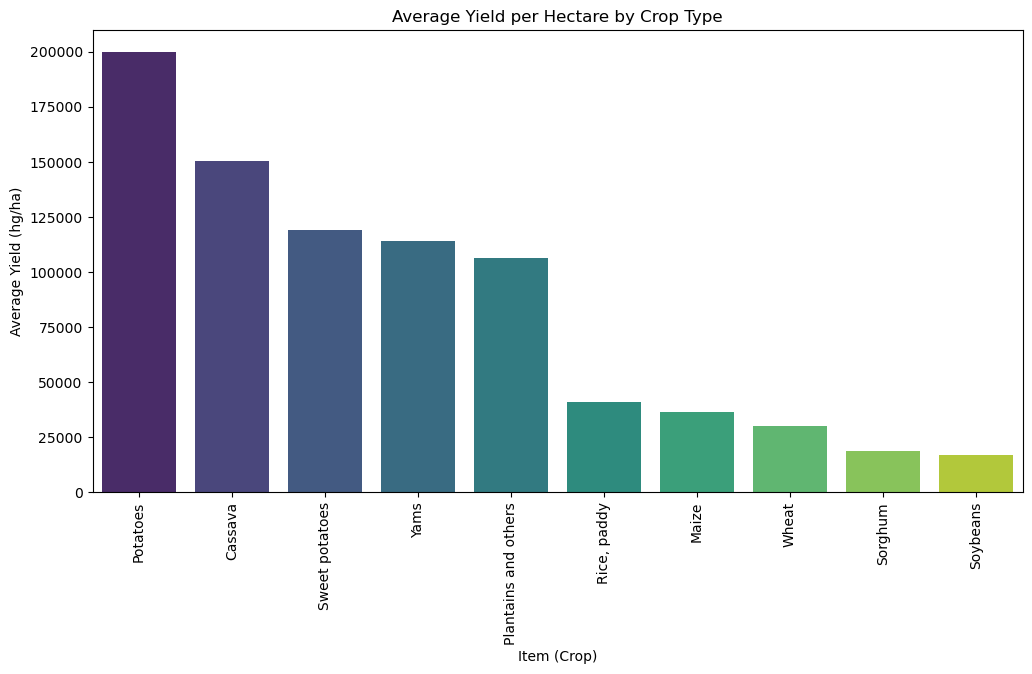

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Decode item labels
df["Item"] = label_encoders["Item"].inverse_transform(df["Item"])

# Aggregate mean yield by item
item_yield = df.groupby("Item")["hg/ha_yield"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=item_yield.index, y=item_yield.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Item (Crop)")
plt.ylabel("Average Yield (hg/ha)")
plt.title("Average Yield per Hectare by Crop Type")
plt.show()


In [163]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [165]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.00,16.37
1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [167]:
# Encode categorical variables
label_encoders = {}
for col in ["Area", "Item"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [169]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485,121.00,16.37
1,0,3,1990,66667,1485,121.00,16.37
2,0,4,1990,23333,1485,121.00,16.37
3,0,5,1990,12500,1485,121.00,16.37
4,0,6,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,100,4,2013,22581,657,2550.07,19.76
28238,100,5,2013,3066,657,2550.07,19.76
28239,100,6,2013,13142,657,2550.07,19.76
28240,100,7,2013,22222,657,2550.07,19.76


In [171]:
# Define features and target variable
X = df.drop(columns=["hg/ha_yield"])
y = df["hg/ha_yield"]

In [173]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [175]:
# Display dataset shape after preprocessing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22593, 6), (5649, 6), (22593,), (5649,))

In [177]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "svm": SVR(kernel="linear", C=1.0)
}

In [196]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R² Score": r2, "RMSE": rmse}

In [197]:
# Display optimized results
results

{'Linear Regression': {'R² Score': 0.0842517227604167,
  'RMSE': 81501.7644654454},
 'Decision Tree': {'R² Score': 0.9573692951683271, 'RMSE': 17584.91253136441},
 'Random Forest': {'R² Score': 0.9857183008700959, 'RMSE': 10178.151142271206},
 'svm': {'R² Score': -0.1874968308786913, 'RMSE': 92810.08823202421}}

## Conclusion
- After testing multiple regression models, the Random Forest Regressor was found to be the best-performing model.

Model Performance:
- R² Score: 0.9857
- Root Mean Squared Error (RMSE): 10178.15

This indicates that Random Forest is able to explain approximately 98.57% of the variance in crop yield, making it the most reliable model for prediction in this dataset.

Would you like any further analysis, such as feature importance or hyperparameter tuning? ​